In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score as auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rbm import RBM
from sklearn.preprocessing import LabelEncoder

In [38]:
columns=["duration", "protocol_type", "service", "flog", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attemped", "num_root", "num_failed_creations",
        "num_shells", "num_access_filed", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
        "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
        "dst_host_srv_count", "dst_host_same_srv_port_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [40]:
df=pd.read_csv("kddcup.data.corrected", sep=",", names=columns, index_col=None)

In [41]:
print(df.shape)
df.head()

(4898431, 42)


,duration,protocol_type,service,flog,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_port_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [42]:
df=df[df["service"]=="http"]
df=df.drop("service", axis=1)
columns.remove("service")

print(df.shape)
df.tail()

(623091, 41)


,duration,protocol_type,flog,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_port_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
4898426,0,tcp,SF,212,2288,0,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,SF,219,236,0,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,SF,218,3610,0,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,SF,219,1234,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.
4898430,0,tcp,SF,219,1098,0,0,0,0,0,...,255,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.


In [43]:
for col in df.columns:
    if df[col].dtype=="object":
        encoded=LabelEncoder()
        encoded.fit(df[col])
        df[col]=encoded.transform(df[col])

In [127]:
import numpy as np
anomaly=df[df["label"]!=4]
normal=df[df["label"]==4]

for f in range(0,10):
    normal=normal.iloc[np.random.permutation(len(normal))]
novelties=pd.concat([normal[:50000], anomaly])
novelties.shape

(54045, 41)

In [47]:
with pd.option_context ('display.max_row', 5, 'display.max_columns', 41):
    print(novelties)

         duration  protocol_type  flog  src_bytes  dst_bytes  land  \
1346083         0              0     9        166        429     0   
114976          0              0     9        332       2505     0   
...           ...            ...   ...        ...        ...   ...   
4764841         0              0     9      54540       8314     0   
4764842         0              0     9      54540       8314     0   

         wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
1346083               0       0    0                  0          1   
114976                0       0    0                  0          1   
...                 ...     ...  ...                ...        ...   
4764841               0       0    2                  0          1   
4764842               0       0    2                  0          1   

         num_compromised  root_shell  su_attemped  num_root  \
1346083                0           0            0         0   
114976                 0        

In [128]:
for c in columns:
    if(c != "protocol_type" and c != "flag" and c != "label"):
        novelties[c]=StandardScaler().fit_transform(novelties[c].values.reshape(-1,1))
novelties.head()

,duration,protocol_type,flog,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_port_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
302954,-0.006808,0,0.351839,-0.184635,-0.362762,0.0,0.0,0.0,-0.209779,0.0,...,0.330665,0.198045,-0.127109,-0.334781,-0.573456,-0.181576,-0.179361,-0.322717,-0.326979,4
1039065,-0.006808,0,0.351839,-0.204292,-0.353053,0.0,0.0,0.0,-0.209779,0.0,...,0.330665,0.198045,-0.127109,-0.389173,-0.573456,-0.181576,-0.179361,-0.322717,-0.326979,4
67273,-0.006808,0,0.351839,-0.207007,0.343776,0.0,0.0,0.0,-0.209779,0.0,...,0.330665,0.198045,-0.127109,1.405766,-0.188103,-0.181576,-0.179361,-0.322717,-0.326979,4
380384,-0.006808,0,0.351839,-0.201859,-0.320850,0.0,0.0,0.0,-0.209779,0.0,...,0.330665,0.198045,-0.127109,-0.389173,-0.573456,-0.181576,-0.179361,-0.322717,-0.326979,4
190895,-0.006808,0,0.351839,-0.205228,0.125855,0.0,0.0,0.0,-0.209779,0.0,...,0.330665,0.198045,-0.127109,-0.389173,-0.573456,-0.181576,-0.179361,-0.322717,-0.326979,4


In [129]:
x_train=novelties.iloc[:43000, 1:-2].values
y_train=novelties.iloc[:43000, -1].values

x_test=novelties.iloc[43000:, 1:-2].values
y_test=novelties.iloc[43000:, -1].values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43000, 38)
(43000,)
(11045, 38)
(11045,)


In [130]:
model=RBM(x_train.shape[1], 20, visible_unit_type='gauss', main_dir="./", model_name="rbm_model2.ckpt",
            gibbs_sampling_steps=4, learning_rate=0.001, momentum=0.95, batch_size=512, num_epochs=20, verbose=1)

Validation cost at step 0: 1.414356
Validation cost at step 1: 1.3892943
Validation cost at step 2: 1.3852983
Validation cost at step 3: 1.3815352
Validation cost at step 4: 1.3935494
Validation cost at step 5: 1.3778062
Validation cost at step 6: 1.3833164
Validation cost at step 7: 1.3802398
Validation cost at step 8: 1.3752573
Validation cost at step 9: 1.3603255
Validation cost at step 10: 1.3644743
Validation cost at step 11: 1.3620617
Validation cost at step 12: 1.3644476
Validation cost at step 13: 1.3550569
Validation cost at step 14: 1.3588736
Validation cost at step 15: 1.3458743
Validation cost at step 16: 1.3502936
Validation cost at step 17: 1.3594443
Validation cost at step 18: 1.3576297
Validation cost at step 19: 1.3454728


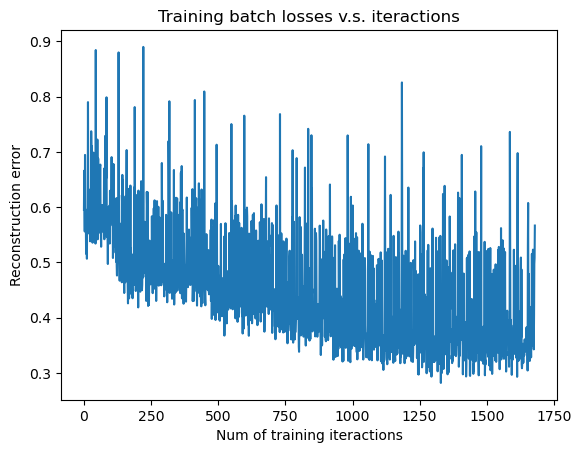

In [131]:
model.fit(x_train, validation_set=x_test)

In [132]:
for f in range(0, len(y_test)):
    if y_test[f]==4:
        y_test[f]=0
    else:
        y_test[f]=1

In [119]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [133]:
costs=model.getFreeEnergy(x_test).reshape(-1)
score=auc(y_test, costs)
print(score)

INFO:tensorflow:Restoring parameters from ./rbm_model2.ckpt
0.997498181176055


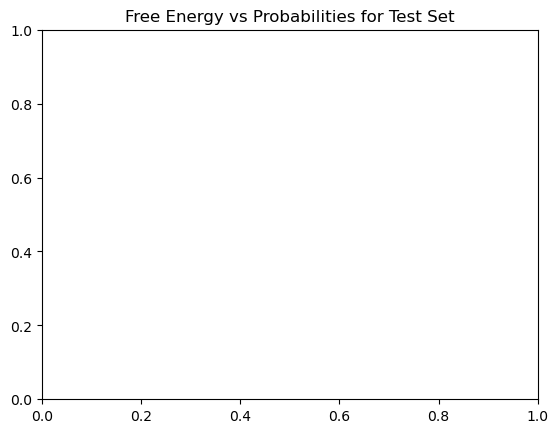

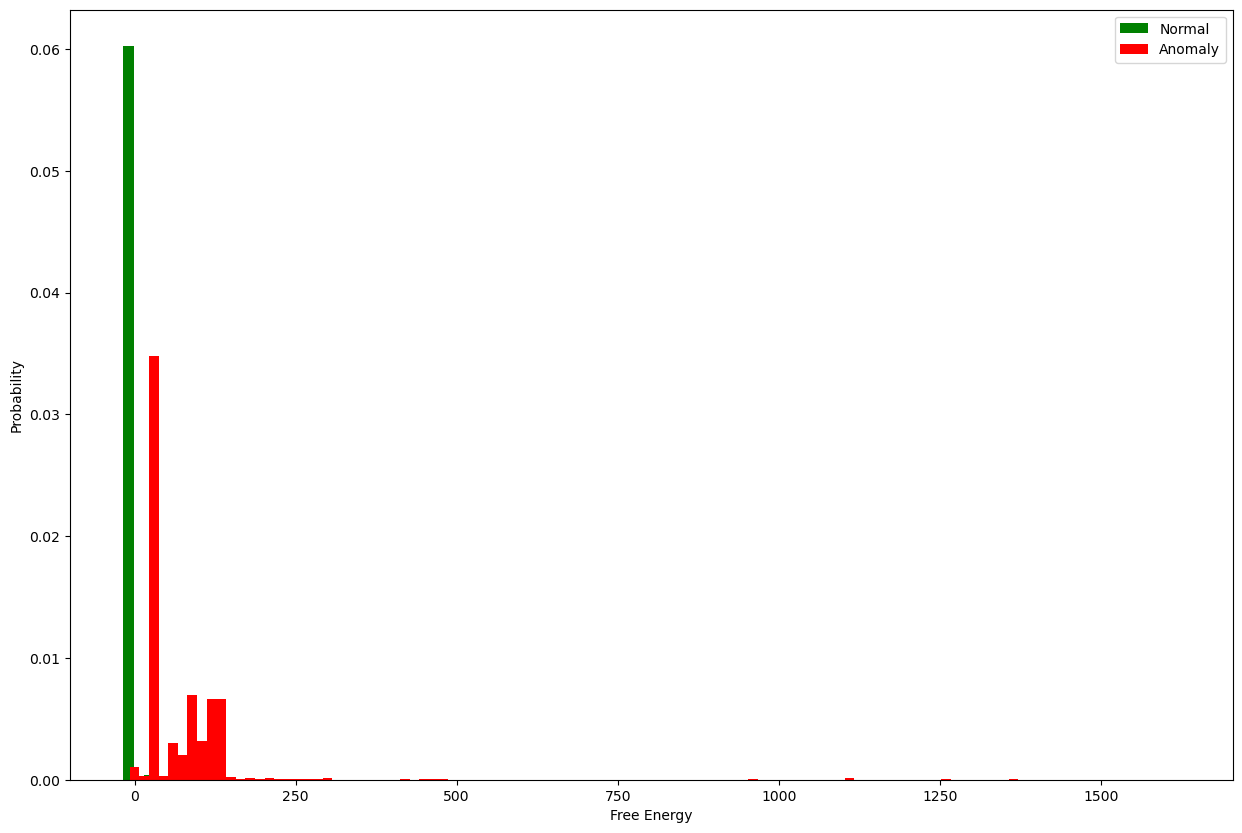

In [134]:
plt.title('Free Energy vs Probabilities for Test Set')
plt.figure(figsize=(15,10))
plt.xlabel('Free Energy')
plt.ylabel('Probability')
plt.hist(costs[y_test==0], bins=100, color='green',density=True,  label='Normal')
plt.hist(costs[y_test==1], bins=100, color='red',density=True,  label='Anomaly')

plt.legend(loc="upper right")